# Neural Network: Bank Customer Churn Prediction.

#### **Demo Project:** The aim of this project is to Build an neural network based classifier that can determine whether a customer will leave the bank or not in the next 6 months.

#### Author: **Gabriel Egbenya**

## Importing necessary libraries

In [1]:
#Installing the libraries with the specified version.
#!pip install tensorflow

In [2]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

from sklearn.preprocessing import StandardScaler #to scale the data

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [4]:
data = pd.read_csv('Churn.csv')

## Data Overview

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understanding the shape fo the dataset.

In [7]:
data.shape
rows, cols = data.shape   #assigning a variable to the result
print(f'There are {rows} rows and {cols} columns in the dataset')

There are 10000 rows and 14 columns in the dataset


In [8]:
data.info()
print('-'*60)  #Print a line to separate the information
print('The unique datatypes of the different columns in the datasets are\n1: int64\n2: float64\n3: object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
------------------------------------------------------------
The unique datatypes of the diffe

* All the columns have 10000 rows, which can be inferred that there are no null values present in the dataset.

### Checking for missing values

In [9]:
# Double Checking if there are any missing value
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the data

### Removing features with only unique values.

In [10]:
#to view the unique value in each fields
data.nunique() 

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Dropped Rownumber and CustomerId columns as they only contains unique values.
* ~99% of the records in EstimatedSalary column are unique, but I will not drop it for now. I will futher review this field during feature engineering 

In [11]:
data.drop(["RowNumber", "CustomerId"], axis=1, inplace=True)

In [12]:
data.shape

(10000, 12)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Age: Average age of people in the sample dataset is around 40 years, age has a wide range from 18 to 92 years.
* HasCrCard: The HasCrCard field only contains binary number of 0 and 1
* IsActiveMember: The HasCrCard field only contains binary number of 0 and 1
* Exited: The HasCrCard field only contains binary number of 0 and 1
* CreditScore: The average score is 650. The minimum and maximum score is 350 and 850 respectively.
* EstimatedSalary: There's a huge gap between the minimum value and the 25th percentile. This mostly means there are outliers in the data.

### Checking for duplicates

In [14]:
# checking for duplicate values
data.duplicated().sum()

0

## Exploratory Data Analysis

In [15]:
# function to create histogram and boxplot


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to create stacked barplot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

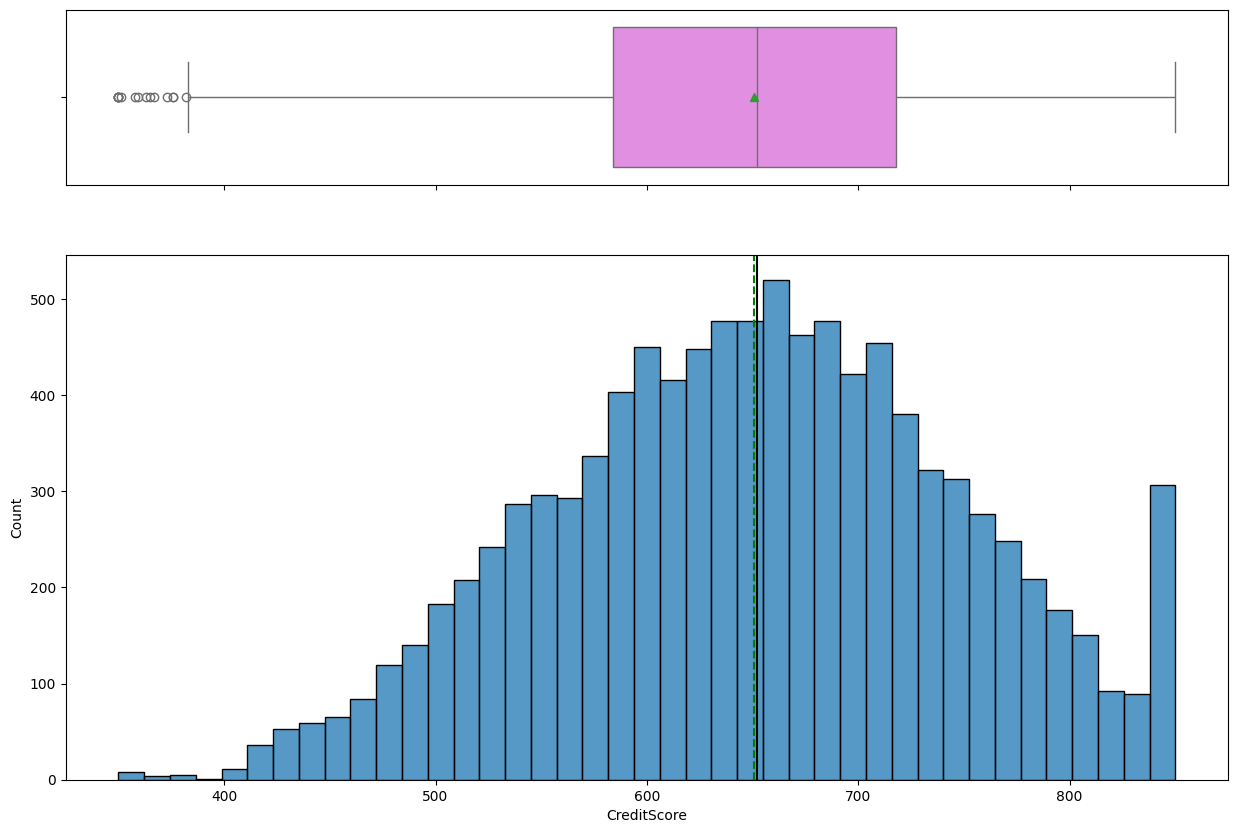

In [19]:
histogram_boxplot(data, "CreditScore")

* The data seems to be a slighly left skewed distribution.
* ~2% of the customers have credit score greater or equals to 800
* Less that 1 % of the bank's customers have a credit score lower or equals to 400

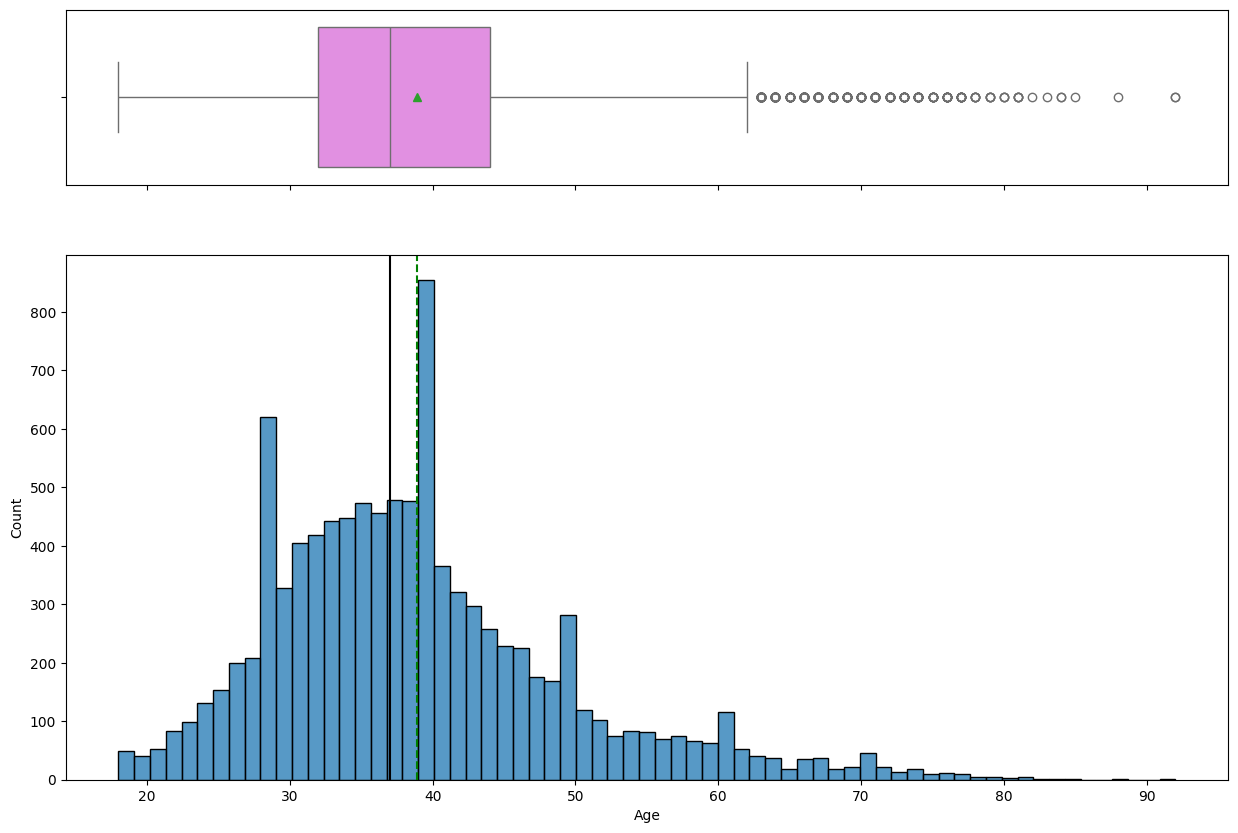

In [20]:
histogram_boxplot(data, "Age")

* The average age of the customers is 39 years.
* The minimum age of the customers is 18 years.
* The distribution is rightly skewed indicating the presence of outliers. 
* ~2% of the customers are 70 years old or older.

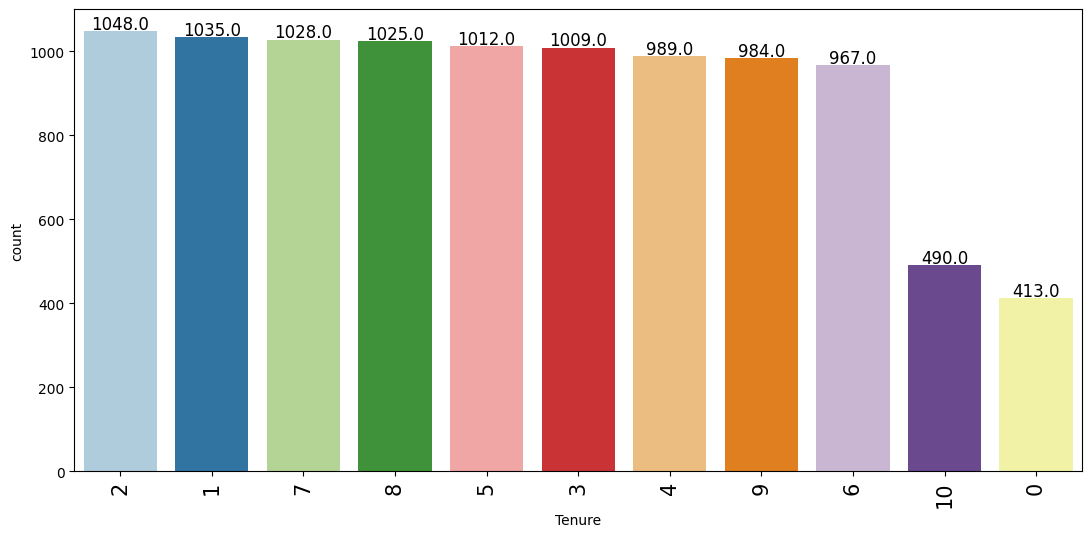

In [21]:
labeled_barplot(data, "Tenure")

* ~4.9% of customers has been with the bank for 10 years
* ~4.1% of customers has been with the bank less than 1 year.
* Customers with 2 years tenure with the bank has the most occurrence in the data

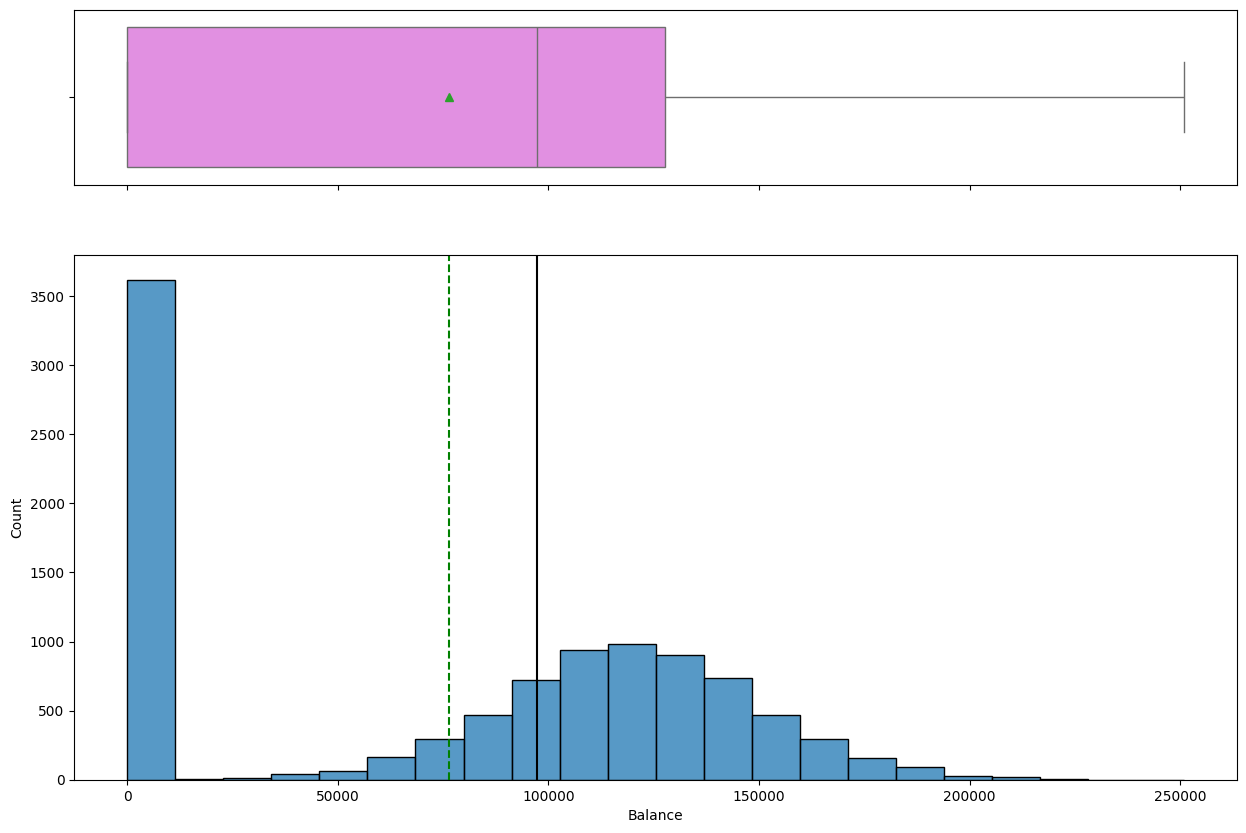

In [22]:
histogram_boxplot(data, "Balance")

* ~36% of the bank's customers in the sample dataset have an account balance of 0.

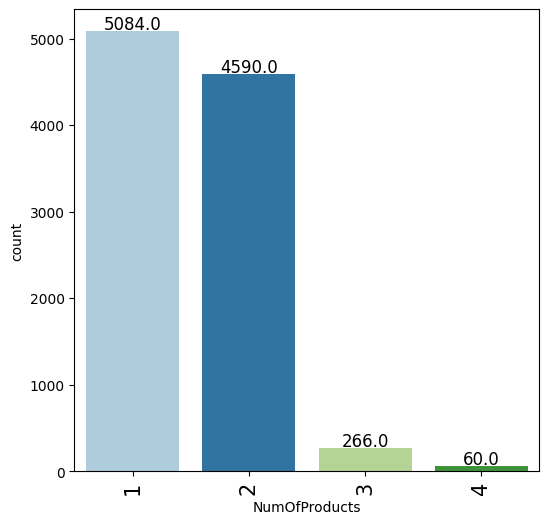

In [23]:
labeled_barplot(data, "NumOfProducts")

* Majority of the customers purchased only 1 product of the bank, followed by customers who purchased 2 products.

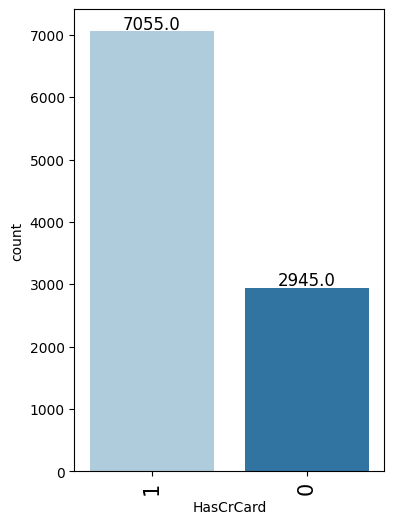

In [24]:
labeled_barplot(data, "HasCrCard")

* ~70.5% of the customer has credit card

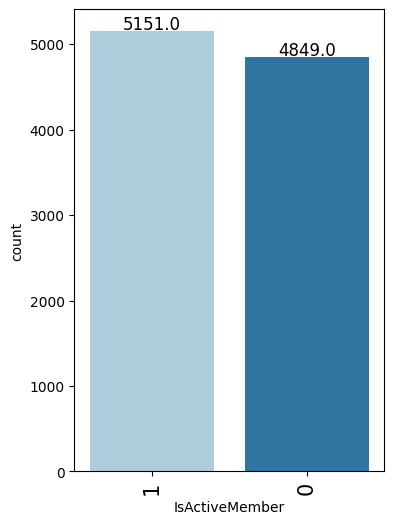

In [25]:
labeled_barplot(data, "IsActiveMember")

* ~51.5% of the customers are active members of the bank. i.e Use bank products regularly.

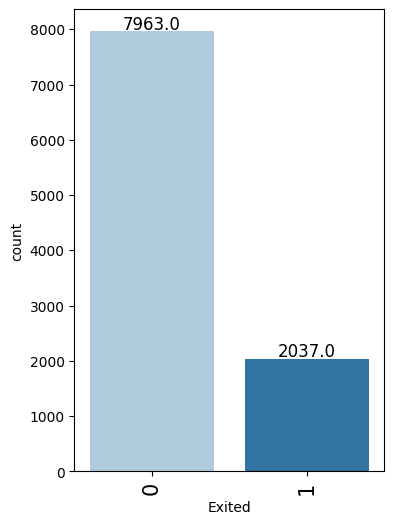

In [26]:
labeled_barplot(data, "Exited")

* ~20.4% of the customer left the bank within six month 

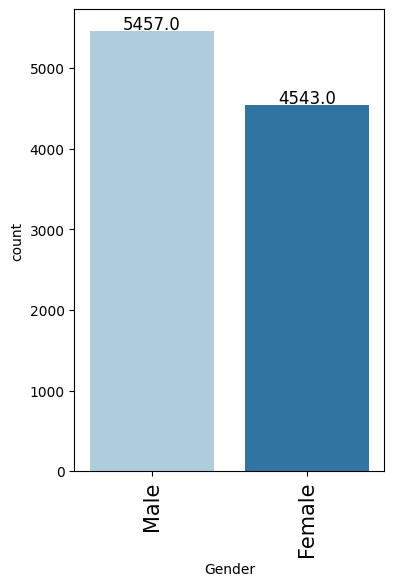

In [27]:
labeled_barplot(data, "Gender")

* ~54.6% of the bank's customers in the sample data are Male.

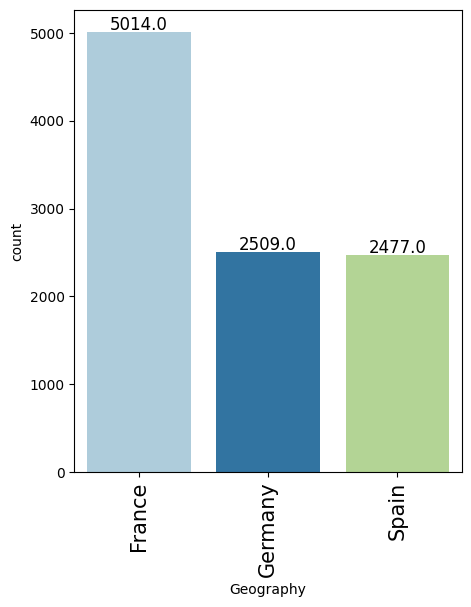

In [28]:
labeled_barplot(data, "Geography")

* Majority of the bank's customers resides in France

### Bivariate Analysis

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


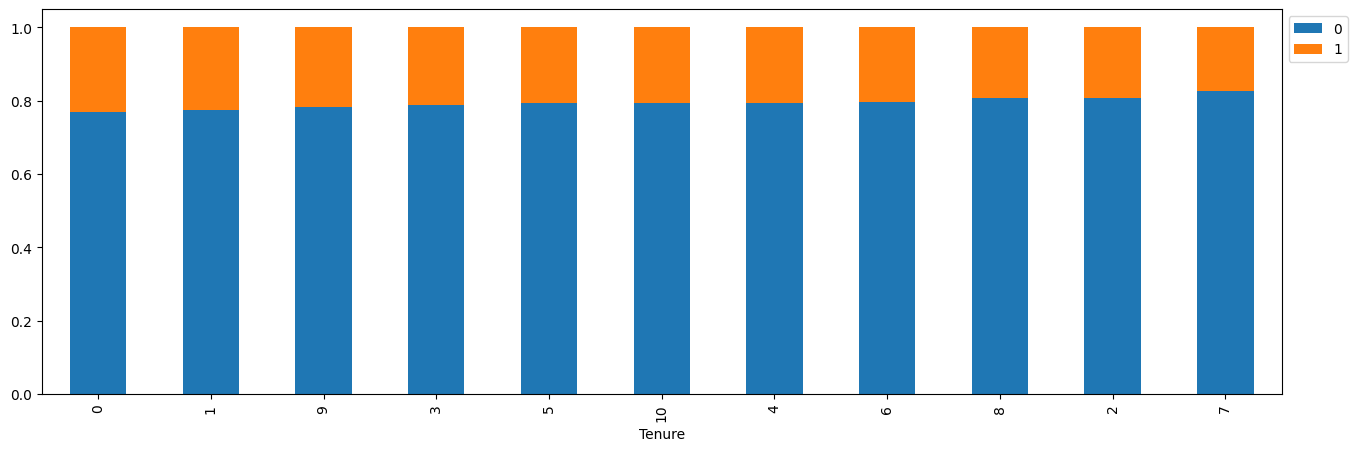

In [29]:
stacked_barplot(data, "Tenure",  "Exited")

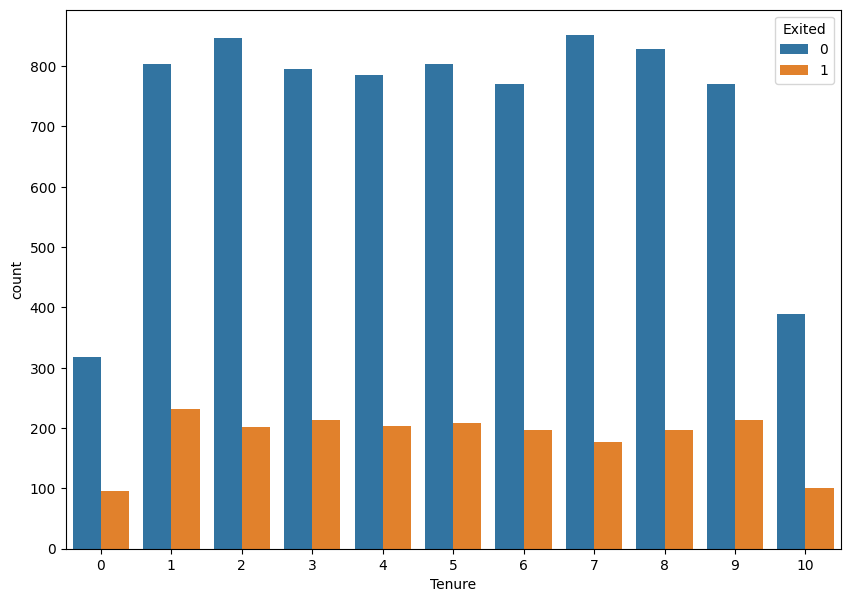

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='Tenure', hue='Exited');

* ~17% of customers who have a tenure of 7 years exited the bank.
* ~23% of customers who have been with the bank less than 1 year exited the bank.
* These two groups have the lowest and highest percentage of customers who left the bank within 6 months

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


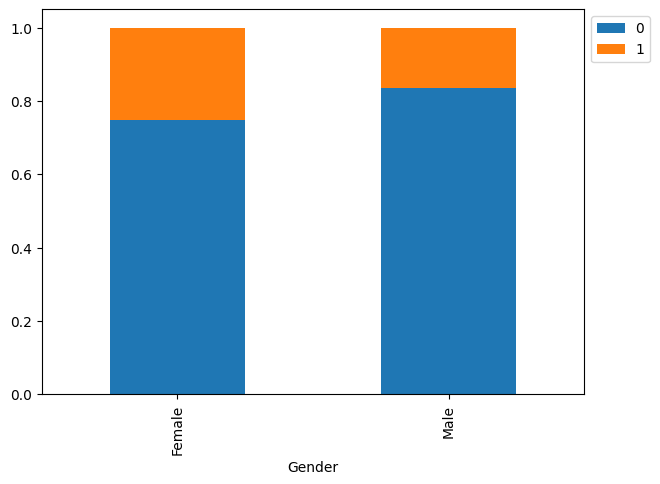

In [31]:
stacked_barplot(data, "Gender",  "Exited")

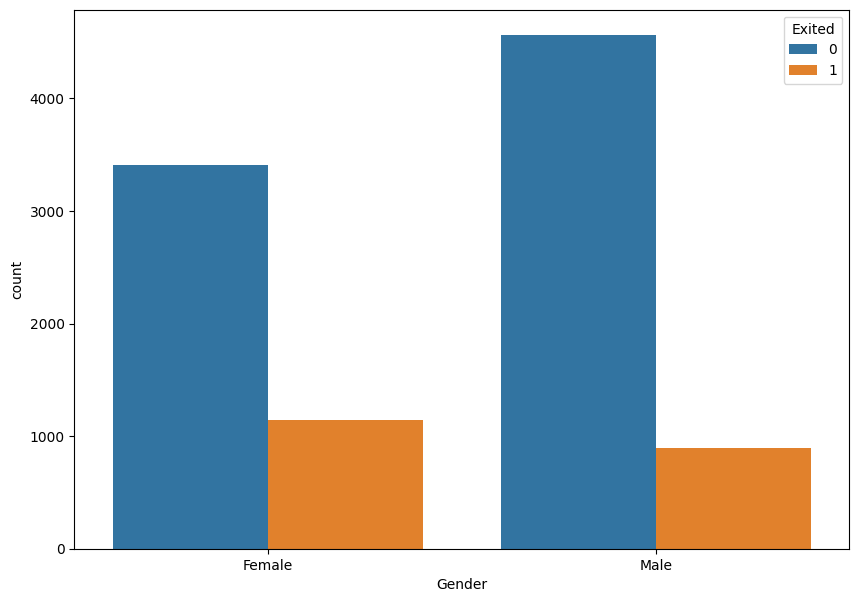

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='Gender', hue='Exited');

* Female customers has the h higher percentage to customers who churns. hence they are more likely to leave the bank services within six month when compared to male customers.


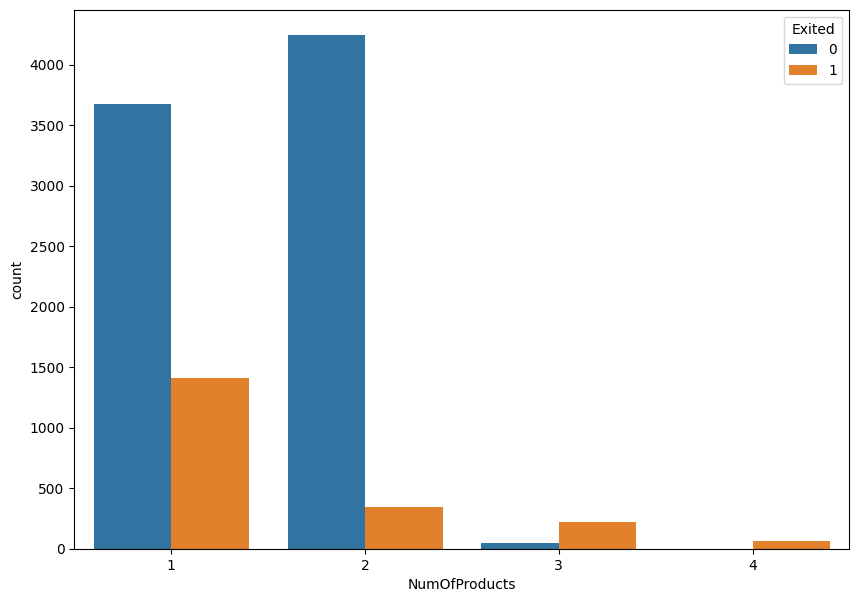

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='NumOfProducts', hue='Exited');


- ~100% of customers who purchase 4 products through the bank churns.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


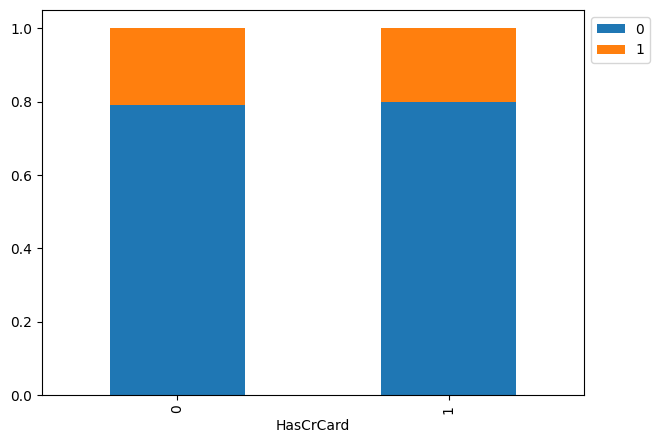

In [34]:
stacked_barplot(data, "HasCrCard",  "Exited")

- Customer with credit card and those without credit card have no significant difference on the target.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


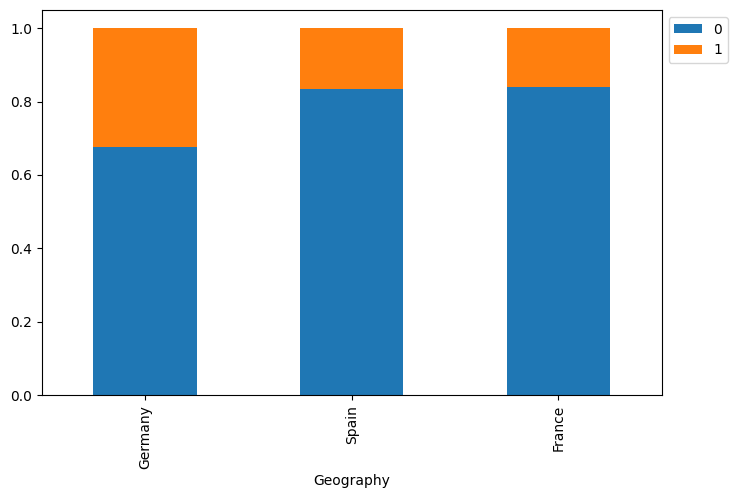

In [35]:
stacked_barplot(data, "Geography",  "Exited")

* German customers has the highest percentage to exit the bank.
* ~32% of customers from Germany are likely to exit the bank.

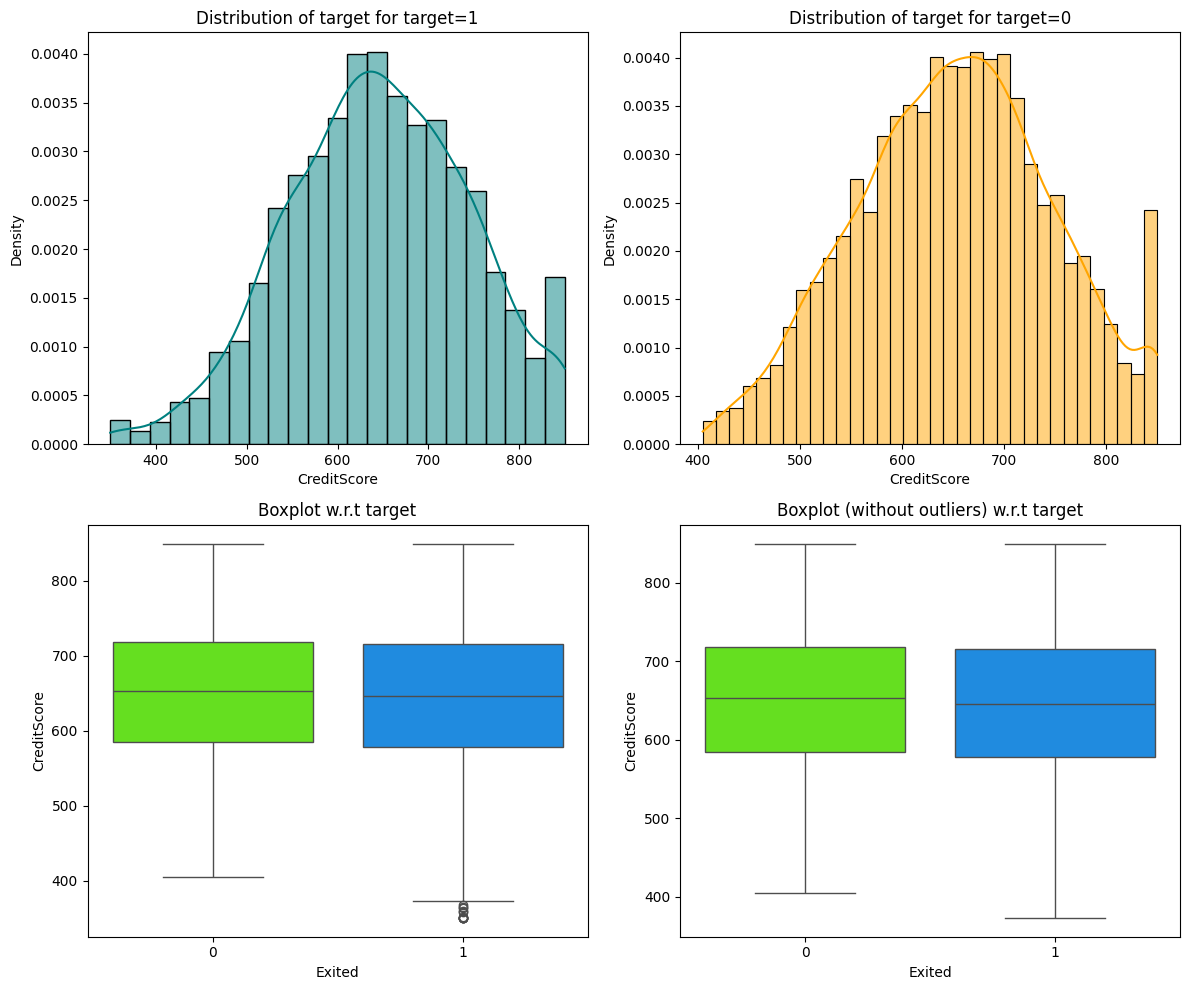

In [36]:
distribution_plot_wrt_target(data, 'CreditScore', 'Exited')

* CreditScore have a slighly left skewed distributions.
* The average credit score of customers who exited and those who stayed with the bank are very close to each other.

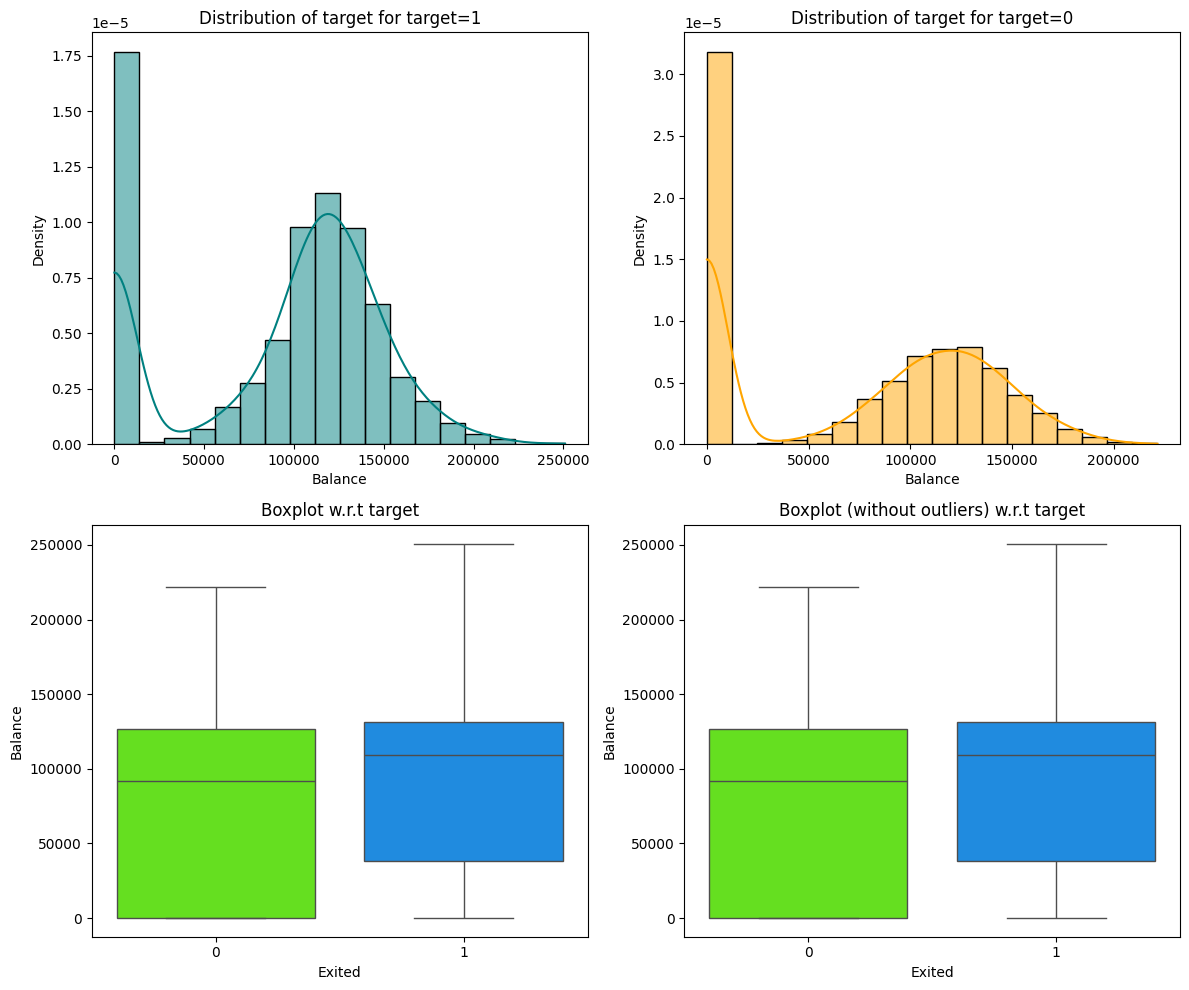

In [37]:
distribution_plot_wrt_target(data, 'Balance', 'Exited')

* Majority of the bank's customers have an account balance of 0.

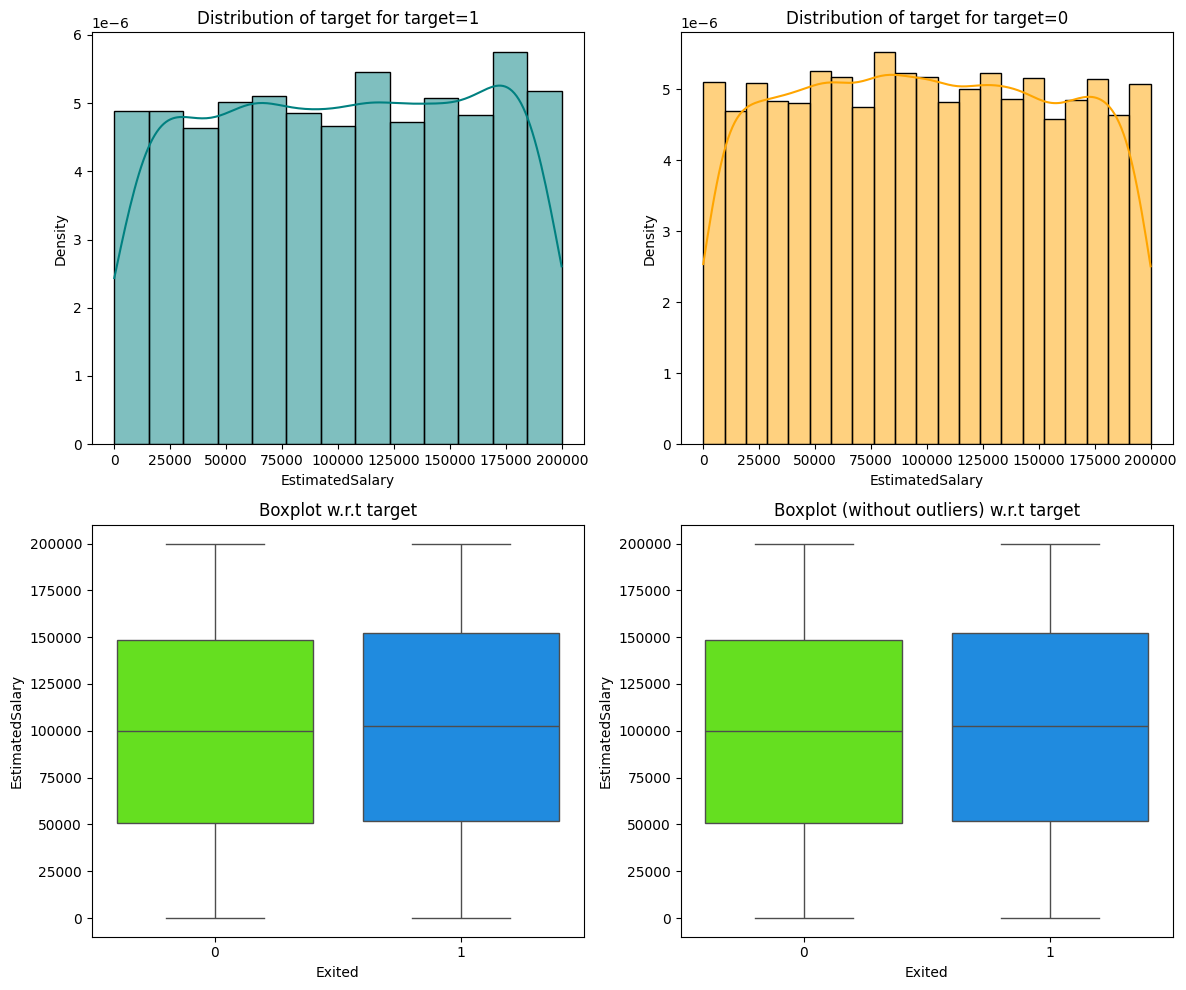

In [38]:
distribution_plot_wrt_target(data, 'EstimatedSalary', 'Exited')

* The Estimated salary of the bank's customers don't seem to have any impact on the target variable

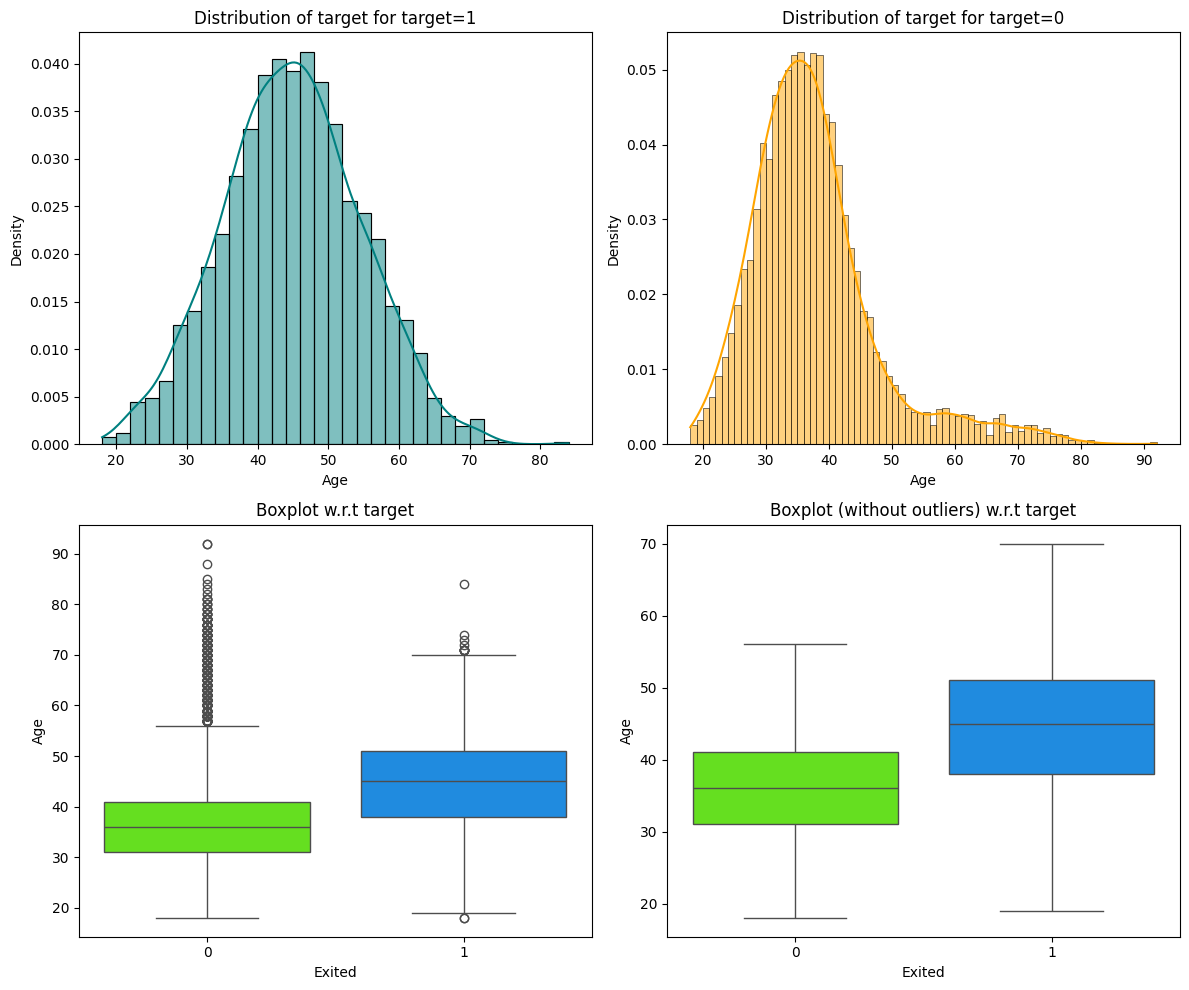

In [39]:
distribution_plot_wrt_target(data, 'Age', 'Exited')

In [40]:
data.loc[(data['Age'] > 60 ) & (data['Exited'] == 0)].count()[0]/ data.loc[(data['Age'] > 60 ) ].count()[0]

0.7521551724137931

* ~ 75% of customers who are above 60 years of age will churn.

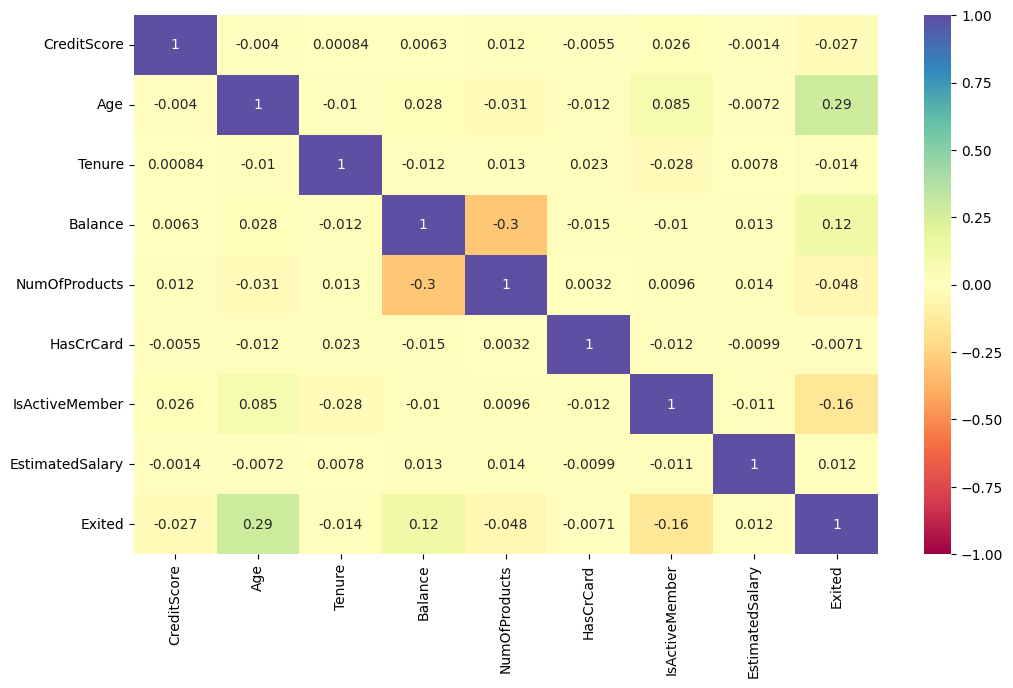

In [41]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)
plt.show()

* There's no strong corellation in the data.

## Data Preprocessing

### Outlier Detection

#### Let's check for outliers in the data.

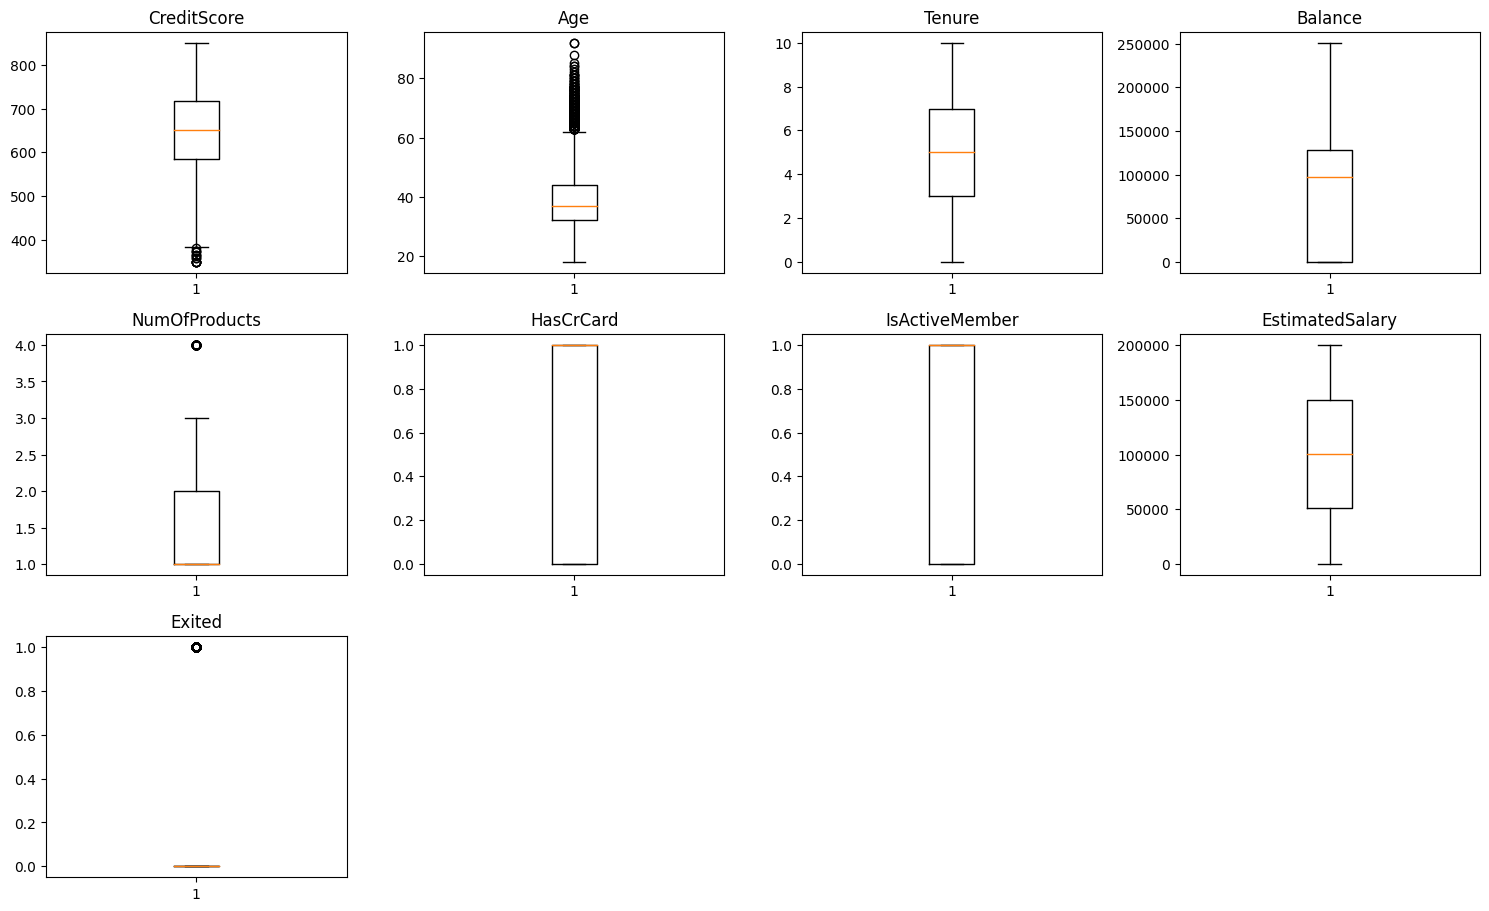

In [42]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Dummy Variable Creation

### Feature Engineering

In [43]:
###Dropping the column as they will not add value to the modeling
data.drop(['Surname'], axis=1, inplace=True)

In [44]:
df = data.copy() #make a copy of the original dataframe

### Encoding the categorical variables

In [45]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [46]:
# Encoding the categorical variables using one-hot encoding
df = pd.get_dummies(df,
    columns=df.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,dtype=int
)

### Train-validation-test Split

In [47]:
# defining the dependent and independent variables
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

In [48]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [49]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


### Data Normalization

In [50]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4472,660,23,6,166070.48,2,0,0,90494.72,1,0,0
4034,601,42,4,96763.89,1,1,1,199242.65,0,1,0
1454,521,34,7,70731.07,1,1,1,20243.97,0,1,0
9099,738,29,2,0.00,2,1,1,170421.13,0,0,1
2489,714,28,6,122724.37,1,1,1,67057.27,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6444,693,37,6,95900.04,1,1,1,38196.24,1,0,0
4806,697,33,1,87347.70,1,1,0,172524.51,0,0,0
2622,627,27,0,185267.45,2,1,1,77027.34,1,0,1
203,711,38,2,129022.06,2,1,1,14374.86,0,0,0


In [51]:
# Define the columns to scale
num_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
X_train[num_columns] = sc.fit_transform(X_train[num_columns])
X_val[num_columns] = sc.transform(X_val[num_columns])
X_test[num_columns] = sc.transform(X_test[num_columns])

In [52]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4472,0.091585,-1.519034,0.351144,1.447084,2,0,0,-0.173839,1,0,0
4034,-0.516304,0.279984,-0.336475,0.340252,1,1,1,1.713093,0,1,0
1454,-1.340560,-0.477497,0.694954,-0.075495,1,1,1,-1.392789,0,1,0
9099,0.895235,-0.950923,-1.024094,-1.205076,2,1,1,1.212999,0,0,1
2489,0.647958,-1.045608,0.351144,0.754843,1,1,1,-0.580512,0,0,1


### Utility functions

In [53]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting the customer will churn in the next 6 months, when he/she will not churn.
* Predicting the customer will not churn in the next 6 months, when he/she infact will churn.

**Which case is more important?**

Both cases are actually important for the purposes of this case study. Wrongly predicting a customer will churn will make management spend resources on improvement of services which will reduce overall profitability. However, predicting a customer will not churn whereas the customer eventually churns will also lead to loss of revenue to the bank.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


### Neural Network with SGD Optimizer

### model 0

In [55]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50
batch_size = 32

In [56]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [57]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [60]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8004 - val_loss: 0.5902
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5712 - val_loss: 0.5376
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5301 - val_loss: 0.5191
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5148 - val_loss: 0.5111
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5080 - val_loss: 0.5074
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5047 - val_loss: 0.5054
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5029 - val_loss: 0.5041
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5017 - val_loss: 0.5030
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5007 - val_loss: 0.5021
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4997 - val_loss: 0.5010
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4985 - val_loss: 0.4996
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [61]:
print("Time taken in seconds ",end-start)

Time taken in seconds  27.71654748916626


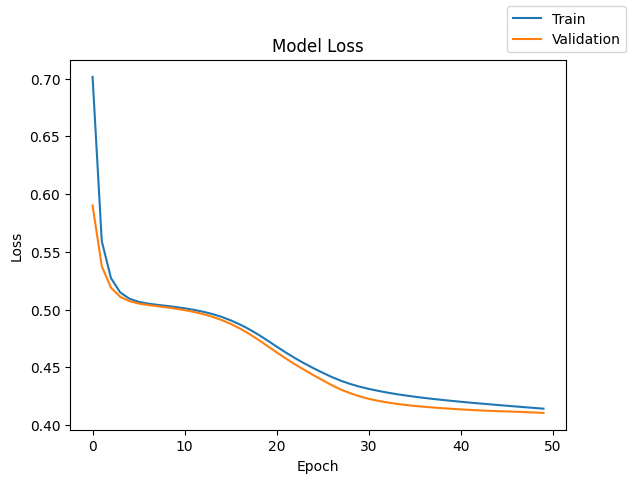

In [62]:
plot(history,'loss')

In [63]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.825167,0.825167,0.805396,0.794075


In [64]:
model_0_valid_perf = model_performance_classification(model, X_val, y_val)
model_0_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8265,0.8265,0.807439,0.796624


- Train F1 score of ~0.79 and val F1 score of ~0.79 indicate consistent performance of the model between training and validation datasets.

- Even though it's a good score, the rate of improvement over the epochs is still low.

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Model1

In [65]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [66]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [69]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6552 - val_loss: 0.4778
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4671 - val_loss: 0.4442
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4438 - val_loss: 0.4299
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4336 - val_loss: 0.4232
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4276 - val_loss: 0.4193
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4232 - val_loss: 0.4166
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4195 - val_loss: 0.4148
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4163 - val_loss: 0.4129
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4131 - val_loss: 0.4111
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4100 - val_loss: 0.4097
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4075 - val_loss: 0.4084
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [70]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.613492965698242


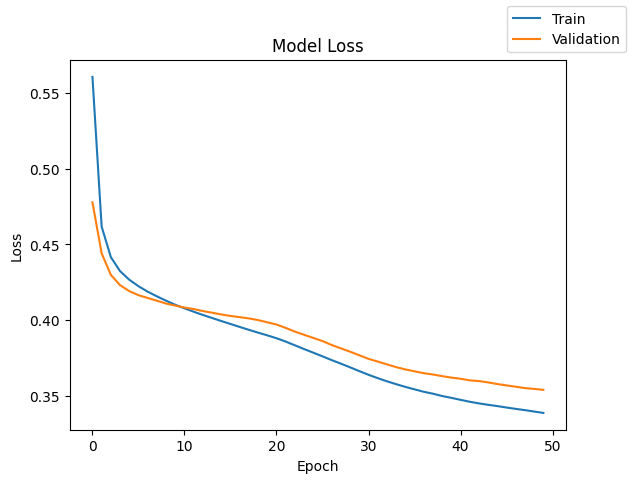

In [71]:
plot(history,'loss')

In [72]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8655,0.8655,0.85688,0.854343


In [73]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.847,0.847,0.834142,0.833212


- There's a significang improvement in the scores. 

### Neural Network with Adam Optimizer and Dropout

### Model 2

In [74]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [75]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dropout (Dropout)         │ (None, 14)         │          0 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dropout_1 (Dropout)       │ (None, 7)          │          0 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [78]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5891 - val_loss: 0.4676
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5017 - val_loss: 0.4458
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4760 - val_loss: 0.4370
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4635 - val_loss: 0.4309
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4630 - val_loss: 0.4286
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4535 - val_loss: 0.4263
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4566 - val_loss: 0.4258
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4569 - val_loss: 0.4256
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4481 - val_loss: 0.4241
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4501 - val_loss: 0.4242
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4462 - val_loss: 0.4234
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [79]:
print("Time taken in seconds ",end-start)

Time taken in seconds  33.03532075881958


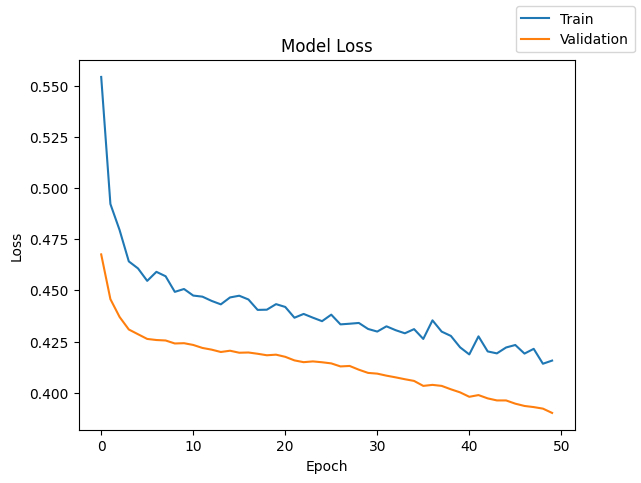

In [80]:
plot(history,'loss')

In [81]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8435,0.8435,0.833871,0.817822


In [82]:
model_2_valid_perf = model_performance_classification(model, X_val, y_val)
model_2_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8365,0.8365,0.825804,0.806156


 - There's no improvement in the scores

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Model 3

In [83]:
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 1222
Before Oversampling, counts of label 'Existing Customer': 4778 

After Oversampling, counts of label 'Attrited Customer': 4778
After Oversampling, counts of label 'Existing Customer': 4778 

After Oversampling, the shape of train_X: (9556, 11)
After Oversampling, the shape of train_y: (9556,) 



In [84]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [85]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [88]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7171 - val_loss: 0.6734
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6851 - val_loss: 0.6402
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6633 - val_loss: 0.6074
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6343 - val_loss: 0.5816
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6064 - val_loss: 0.5715
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5881 - val_loss: 0.5644
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5759 - val_loss: 0.5538
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5662 - val_loss: 0.5467
Epoch 9/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5591 - val_loss: 0.5406
Epoch 10/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5534 - val_loss: 0.5360
Epoch 11/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5489 - val_loss: 0.5313
Epoch 12/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [89]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.12033534049988


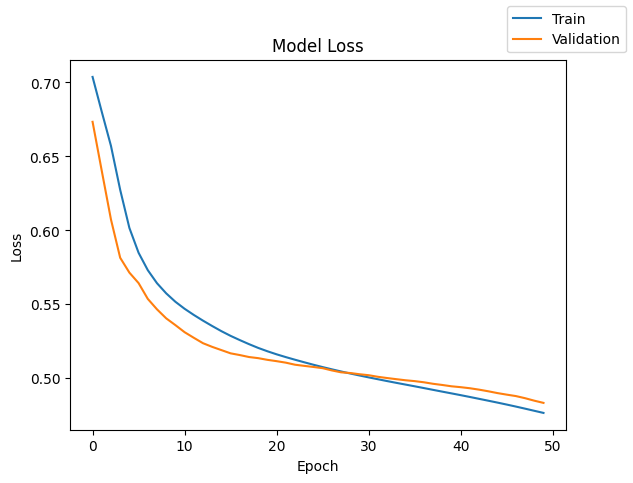

In [90]:
plot(history,'loss')

In [91]:
model_3_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_3_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.772918,0.772918,0.77429,0.772633


In [92]:
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7735,0.7735,0.806377,0.785546


- The score is lower than the previous model on the train set.
- The model performed better on the validation set than on the train set.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Model 4

In [93]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [94]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [95]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [97]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6739 - val_loss: 0.5582
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5594 - val_loss: 0.5291
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5409 - val_loss: 0.5198
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5307 - val_loss: 0.5139
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5221 - val_loss: 0.5089
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5141 - val_loss: 0.5042
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5054 - val_loss: 0.4997
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4975 - val_loss: 0.4934
Epoch 9/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4902 - val_loss: 0.4881
Epoch 10/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4827 - val_loss: 0.4823
Epoch 11/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4751 - val_loss: 0.4787
Epoch 12/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [98]:
print("Time taken in seconds ",end-start)

Time taken in seconds  45.39873027801514


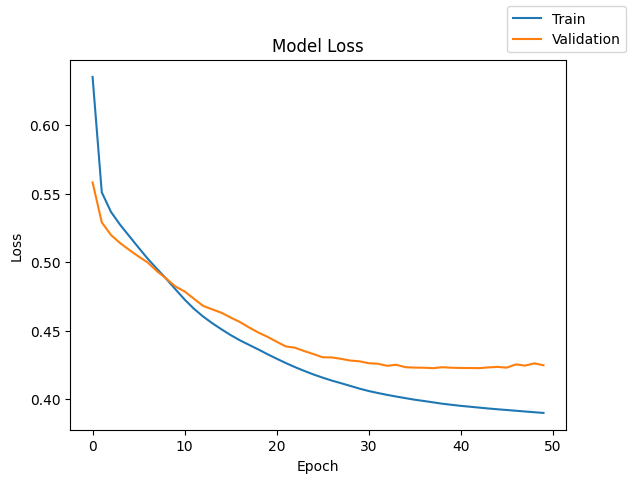

In [99]:
plot(history,'loss')

In [100]:
model_4_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_4_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.817811,0.817811,0.818962,0.817646


In [101]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8045,0.8045,0.828226,0.813262


* There's no improvement in the scores

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

### Model 5

In [102]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [103]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [104]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dropout (Dropout)         │ (None, 14)         │          0 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dropout_1 (Dropout)       │ (None, 7)          │          0 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [106]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7101 - val_loss: 0.6034
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6318 - val_loss: 0.5704
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6099 - val_loss: 0.5477
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5906 - val_loss: 0.5436
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5865 - val_loss: 0.5548
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5747 - val_loss: 0.5498
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5723 - val_loss: 0.5345
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5581 - val_loss: 0.5464
Epoch 9/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5693 - val_loss: 0.5418
Epoch 10/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5519 - val_loss: 0.5392
Epoch 11/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5589 - val_loss: 0.5324
Epoch 12/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [107]:
print("Time taken in seconds ",end-start)

Time taken in seconds  46.12758016586304


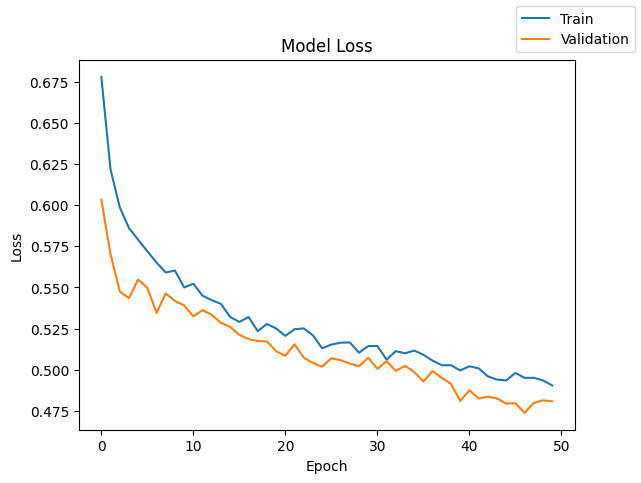

In [108]:
plot(history,'loss')

In [109]:
model_5_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_5_train_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.801381,0.801381,0.801663,0.801335


In [110]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.774,0.774,0.826605,0.790135


- There's no improvement in the scores, but there has been a slight decrease in the difference between train and validation scores

## Model Performance Comparison and Final Model Selection

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (SMOTE SGD, No Regularization)",
    "Neural Network (SMOTE Adam, No Regularization)",
    "Neural Network (SMOTE Adam, dropout [0.4,0.2])"
]

In [112]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (SMOTE SGD, No Regularization)",
    "Neural Network (SMOTE Adam, No Regularization)",
    "Neural Network (SMOTE Adam, dropout [0.4,0.2])"
]


In [113]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (SMOTE SGD, No Regularization)","Neural Network (SMOTE Adam, No Regularization)","Neural Network (SMOTE Adam, dropout [0.4,0.2])"
Accuracy,0.825167,0.865500,0.843500,0.772918,0.817811,0.801381
Recall,0.825167,0.865500,0.843500,0.772918,0.817811,0.801381
Precision,0.805396,0.856880,0.833871,0.774290,0.818962,0.801663
F1 Score,0.794075,0.854343,0.817822,0.772633,0.817646,0.801335


In [114]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (SMOTE SGD, No Regularization)","Neural Network (SMOTE Adam, No Regularization)","Neural Network (SMOTE Adam, dropout [0.4,0.2])"
Accuracy,0.826500,0.847000,0.836500,0.773500,0.804500,0.774000
Recall,0.826500,0.847000,0.836500,0.773500,0.804500,0.774000
Precision,0.807439,0.834142,0.825804,0.806377,0.828226,0.826605
F1 Score,0.796624,0.833212,0.806156,0.785546,0.813262,0.790135


In [115]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, No Regularization)          -0.002550
Neural Network (Adam, No Regularization)          0.021130
Neural Network (Adam, dropout [0.4,0.2])          0.011665
Neural Network (SMOTE SGD, No Regularization)    -0.012913
Neural Network (SMOTE Adam, No Regularization)    0.004385
Neural Network (SMOTE Adam, dropout [0.4,0.2])    0.011200
Name: F1 Score, dtype: float64

- Final Model: **Neural Network (Adam, No Regularization)**
- Reasoning:
  - Best F1 score on the training set (~0.85), indicating strong performance in learning from the training data.
  - Best F1 score on the validation set (~0.83), demonstrating good performance in generalizing to unseen data.
  - When considering validation scores only, Model 1 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.

### Final Model

In [116]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [117]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [118]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 14)         │        168 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 7)          │        105 │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 1)          │          8 │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [120]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5264 - val_loss: 0.4591
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4548 - val_loss: 0.4377
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4384 - val_loss: 0.4300
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4321 - val_loss: 0.4256
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4279 - val_loss: 0.4218
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4236 - val_loss: 0.4181
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4187 - val_loss: 0.4142
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4132 - val_loss: 0.4099
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4075 - val_loss: 0.4054
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4018 - val_loss: 0.4007
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3962 - val_loss: 0.3956
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [121]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [122]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4778
           1       0.75      0.51      0.61      1222

    accuracy                           0.87      6000
   macro avg       0.82      0.73      0.76      6000
weighted avg       0.86      0.87      0.86      6000



In [123]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1592
           1       0.71      0.46      0.55       408

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [124]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



- The weighted F1 score on the test data is ~0.85

- An F1 score of ~0.85 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

- Model can be further tuned to deal with minority class.

## Actionable Insights and Business Recommendations

* Our neural network model has successfully explained approximately 85% of the variation in the data.

- The management of the bank can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an customer is likely to leave and join another service provider within 6 months or not, and this process seems to be easier and more time-efficient than other methods.

* Our analysis has revealed that customers located in Germany are more likely to churn, so management should increase efforts on improvement of services in this geographical location.

- Our analysis also revealed that a higher percentage of customers who purchase more than 2 products through the bank leaves and joins other service providers. This is most likely related to poor customer relationship and after sales services. I reccommend upskilling or reskilling programs for the customer relations team and employees that interact with customers.

* Female customers are more likely to leave the bank services for other providers. Management should prioritize gender diversity initiatives in its inprovment of services strategies to create a more balanced and inclusive business environment.

- Research shows that there's around 75% chance that customers who are above 60 years will leave the services. Management should consider offering incentives or promotions to customers in this age bracket.

* After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or age.